## ID3 (Iterative Dichotomizer 3)

### Vani K S, Assistant Professor, Department of CSE

### Algorithm invented by Ross Quinlan in 1986 which is used to generate a decision tree from a dataset

### Decision tree is used if we have categorical data, for example: hot, mild, and cold. But Decision trees can handle both categorical and numerical data. 

## Types of Decision Trees: CART(Classification and Regression Trees), ID3

### First of all, dichotomisation means dividing into two completely opposite things. That’s why, the algorithm iteratively divides attributes into two groups which are the most dominant attribute and others to construct a tree.

In [32]:
from pandas import DataFrame 
df_tennis = DataFrame.from_csv('PlayTennis.csv') 

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


### Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

### Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 

In [33]:
print(df_tennis)

   PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
3         Yes      Rain        Mild     High    Weak
4         Yes      Rain        Cool   Normal    Weak
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
7          No     Sunny        Mild     High    Weak
8         Yes     Sunny        Cool   Normal    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
13         No      Rain        Mild     High  Strong


In [34]:
def entropy(probs):  
    import math 
    return sum( [-prob*math.log(prob, 2) for prob in probs] ) 

### Entropy is the measures of impurity, disorder or uncertainty in a bunch of examples.

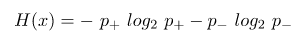

In [35]:
def entropy_of_list(a_list): 
    from collections import Counter 
    cnt = Counter(x for x in a_list)
    print("No and Yes Classes:",cnt) 
    num_instances = len(a_list)
    probs = [x / num_instances for x in cnt.values()] 
    return entropy(probs)  

### Collections module: This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

### Counter is an unordered collection where elements are stored as Dict keys and their count as dict value.

### Compared to Arrays, collections offer good performance for adding and inserting items, and accessing and removing them by their Keys. However, performance is poor if items are to be accessed by index.

In [36]:
print(df_tennis['PlayTennis'])

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: PlayTennis, dtype: object


In [37]:
total_entropy = entropy_of_list(df_tennis['PlayTennis']) 
print("Entropy of given PlayTennis Data Set:",total_entropy)

No and Yes Classes: Counter({'Yes': 9, 'No': 5})
Entropy of given PlayTennis Data Set: 0.9402859586706309


### Information gain (IG) measures how much “information” a feature gives us about the class. An attribute with highest Information gain will be tested/split first.

### The information gain is based on the decrease in entropy after a data-set is split on an attribute

### Information Gain=Entropy(Parent)-[Average Entropy of Children]

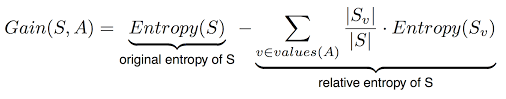

### groupby: Group DataFrame or Series using a mapper or by a Series of columns.A groupby operation involves some combination of splitting the object, applying a function, and combining the results.

### Pandas Series.agg() is used to pass a function or list of function to be applied on a series or even each element of series separately. In case of list of function, multiple results are returned by agg() method.

### Paremeters: func: Function, list of function or string of function name to be called on Series.axis:0 or ‘index’ for row wise operation and 1 or ‘columns’ for column wise operation.

### Return Type of agg: The return type depends on return type of function passed as parameter.

In [38]:
def information_gain(df, split_attribute_name, target_attribute_name): 
    print("Information Gain Calculation of ",split_attribute_name)
    df_split = df.groupby(split_attribute_name) 
    for name,group in df_split: 
        print(name) 
        print(group) 
    nobs = len(df.index) * 1.0 
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    print(df_agg_ent)
    df_agg_ent.columns = ['Entropy', 'PropObservations'] 
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] ) 
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy 

In [39]:
print('Info-gain for Outlook is :')
out1=float(information_gain(df_tennis, 'Outlook', 'PlayTennis'))
print(out1)

Info-gain for Outlook is :
Information Gain Calculation of  Outlook
Overcast
   PlayTennis   Outlook Temperature Humidity    Wind
2         Yes  Overcast         Hot     High    Weak
6         Yes  Overcast        Cool   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
Rain
   PlayTennis Outlook Temperature Humidity    Wind
3         Yes    Rain        Mild     High    Weak
4         Yes    Rain        Cool   Normal    Weak
5          No    Rain        Cool   Normal  Strong
9         Yes    Rain        Mild   Normal    Weak
13         No    Rain        Mild     High  Strong
Sunny
   PlayTennis Outlook Temperature Humidity    Wind
0          No   Sunny         Hot     High    Weak
1          No   Sunny         Hot     High  Strong
7          No   Sunny        Mild     High    Weak
8         Yes   Sunny        Cool   Normal    Weak
10        Yes   Sunny        Mild   Normal  Strong
No and Yes Classes: Counter({'Yes':

In [40]:
print('\n Info-gain for Humidity is: ')
out2=float(information_gain(df_tennis, 'Humidity', 'PlayTennis'))
print(out2)


 Info-gain for Humidity is: 
Information Gain Calculation of  Humidity
High
   PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
3         Yes      Rain        Mild     High    Weak
7          No     Sunny        Mild     High    Weak
11        Yes  Overcast        Mild     High  Strong
13         No      Rain        Mild     High  Strong
Normal
   PlayTennis   Outlook Temperature Humidity    Wind
4         Yes      Rain        Cool   Normal    Weak
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
8         Yes     Sunny        Cool   Normal    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
12        Yes  Overcast         Hot   Normal    Weak
No and Yes Classes: Counter({'No': 4, 'Yes': 3})
No and Yes Classes:

In [41]:
print('\n Info-gain for Wind is:')
out3=float(information_gain(df_tennis, 'Wind', 'PlayTennis'))
print(out3)


 Info-gain for Wind is:
Information Gain Calculation of  Wind
Strong
   PlayTennis   Outlook Temperature Humidity    Wind
1          No     Sunny         Hot     High  Strong
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
13         No      Rain        Mild     High  Strong
Weak
   PlayTennis   Outlook Temperature Humidity  Wind
0          No     Sunny         Hot     High  Weak
2         Yes  Overcast         Hot     High  Weak
3         Yes      Rain        Mild     High  Weak
4         Yes      Rain        Cool   Normal  Weak
7          No     Sunny        Mild     High  Weak
8         Yes     Sunny        Cool   Normal  Weak
9         Yes      Rain        Mild   Normal  Weak
12        Yes  Overcast         Hot   Normal  Weak
No and Yes Classes: Counter({'No': 3, 'Yes': 3})
No and Yes Classes: Counter({'Yes': 6, 'No': 2

In [42]:
print('\n Info-gain for Temperature is:')
out4=float(information_gain(df_tennis, 'Temperature','PlayTennis'))
print(out4)


 Info-gain for Temperature is:
Information Gain Calculation of  Temperature
Cool
  PlayTennis   Outlook Temperature Humidity    Wind
4        Yes      Rain        Cool   Normal    Weak
5         No      Rain        Cool   Normal  Strong
6        Yes  Overcast        Cool   Normal  Strong
8        Yes     Sunny        Cool   Normal    Weak
Hot
   PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
12        Yes  Overcast         Hot   Normal    Weak
Mild
   PlayTennis   Outlook Temperature Humidity    Wind
3         Yes      Rain        Mild     High    Weak
7          No     Sunny        Mild     High    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
13         No      Rain        Mild     High  Strong
No and Yes Cl

### The method next() is used when a file is used as an iterator, typically in a loop, the next() method is called repeatedly. This method returns the next input line, or raises StopIteration when EOF is hit.

### The iter() method creates an object which can be iterated one element at a time.The iter() method takes two parameters:object whose iterator has to be created 

In [43]:
def id3(df, target_attribute_name, attribute_names, default_class=None): 
    from collections import Counter 
    cnt = Counter(x for x in df[target_attribute_name]) 
    print(cnt)
    if len(cnt) == 1: 
        return next(iter(cnt)) 
    elif df.empty or (not attribute_names):
        return default_class 
    else: 
        default_class = max(cnt.keys())
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names] 
        index_of_max = gainz.index(max(gainz)) 
        best_attr = attribute_names[index_of_max]
        print("Best",best_attr)
        tree = {best_attr:{}} 
        remaining_attribute_names = [i for i in attribute_names if i != best_attr] 
        print("Remaining Attributes",remaining_attribute_names)
        for attr_val, data_subset in df.groupby(best_attr):
            
            subtree = id3(data_subset, 
                          target_attribute_name, 
                          remaining_attribute_names, 
                          default_class) 
            tree[best_attr][attr_val] = subtree
            print("SubTree:",subtree)
        return tree

In [44]:
attribute_names = list(df_tennis.columns) 
print("List of Attributes:", attribute_names) 
attribute_names.remove('PlayTennis')  
print("Predicting Attributes:", attribute_names)

List of Attributes: ['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']


### The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a well-formatted and more readable way!

In [45]:
from pprint import pprint 
tree = id3(df_tennis,'PlayTennis',attribute_names) 
print("\n\nThe Resultant Decision Tree is :\n") 
pprint(tree)

Counter({'Yes': 9, 'No': 5})
Information Gain Calculation of  Outlook
Overcast
   PlayTennis   Outlook Temperature Humidity    Wind
2         Yes  Overcast         Hot     High    Weak
6         Yes  Overcast        Cool   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
Rain
   PlayTennis Outlook Temperature Humidity    Wind
3         Yes    Rain        Mild     High    Weak
4         Yes    Rain        Cool   Normal    Weak
5          No    Rain        Cool   Normal  Strong
9         Yes    Rain        Mild   Normal    Weak
13         No    Rain        Mild     High  Strong
Sunny
   PlayTennis Outlook Temperature Humidity    Wind
0          No   Sunny         Hot     High    Weak
1          No   Sunny         Hot     High  Strong
7          No   Sunny        Mild     High    Weak
8         Yes   Sunny        Cool   Normal    Weak
10        Yes   Sunny        Mild   Normal  Strong
No and Yes Classes: Counter({'Yes

### A decision node has two or more branches . Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor is called root node

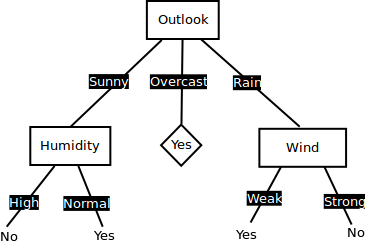

## Test Case

In [46]:
outlook	temperature	humidity	wind


SyntaxError: invalid syntax (<ipython-input-46-50f80345f546>, line 1)

# Decision Tree using Built-in function

In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)

In [48]:
iris = load_iris()

In [49]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [50]:
clf = clf.fit(iris.data, iris.target)

### Graphviz package facilitates the creation and rendering of graph descriptions in the Graphviz graph drawing software from Python.Create a graph object, assemble the graph by adding nodes and edges. 

In [51]:
import graphviz 
from sklearn import tree

In [52]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
!pip3 install graphviz

### Disadvantages of Decision Tree Learning

### 1) They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree.

### 2) Calculations can get very complex, particularly if many values are uncertain and/or if many outcomes are linked.